In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist
from tqdm.notebook import tqdm


In [ ]:
project_dir = r'./sample_data'
os.chdir(project_dir)



In [ ]:
directory_contents = os.listdir()

print(directory_contents)


['anscombe.json', 'README.md', 'merged_data_3.csv', 'merged_data_full203.csv', 'games.csv', 'players.csv', 'tracking_week_1.csv', 'plays.csv', 'tackles.csv', 'california_housing_train.csv', 'mnist_test.csv', 'california_housing_test.csv', 'mnist_train_small.csv']


In [ ]:
players = pd.read_csv('players.csv')
week = pd.read_csv('tracking_week_1.csv')

# Join player positioning information onto a week's worth of tracking data
week = week.merge(players[['nflId']], how='left')

# Print the shape of the merged DataFrame
print(week.shape)


(1407439, 17)


In [ ]:
# Assuming 'week' is your DataFrame containing the data
unique_game_ids = week['gameId'].unique()

# Initialize an empty list to store dataframes for each game
game_data = []

for gid in unique_game_ids:
    game = week.loc[week['gameId'] == gid].copy()
    game_data.append(game)

# Concatenate all game data into one DataFrame
game = pd.concat(game_data, ignore_index=True)

print(game.shape)

(1407439, 17)


In [ ]:
import pandas as pd
import numpy as np

# Assuming 'game' is your DataFrame containing the combined tracking data
# Separate the football's tracking data
football_tracking = game[game['nflId'].isna()]

# Initialize a column for distance to the football
game['distance_to_football'] = np.nan

# Iterate over each frame
for frame in game['frameId'].unique():
    # Extract the football's position for this frame
    football_frame = football_tracking[football_tracking['frameId'] == frame]
    if not football_frame.empty:
        football_x = football_frame.iloc[0]['x']
        football_y = football_frame.iloc[0]['y']

        # Filter the DataFrame for all players in this frame
        frame_data = game[(game['frameId'] == frame) & game['nflId'].notna()]

        # Calculate the distance of each player from the football
        distances = np.sqrt((frame_data['x'] - football_x)**2 + (frame_data['y'] - football_y)**2)

        # Assign the calculated distances to the corresponding rows in the main DataFrame
        game.loc[frame_data.index, 'distance_to_football'] = distances

# Now 'game' DataFrame has an additional column 'distance_to_football' with the calculated distances


In [ ]:
game

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,distance_to_football
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370000,27.27,1.62,1.15,0.16,231.74,147.90,NaN,7.334439
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.470000,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived,9.359082
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.560000,27.01,1.57,0.49,0.15,230.98,147.05,NaN,10.960330
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.640000,26.90,1.44,0.89,0.14,232.38,145.42,NaN,12.784855
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.720000,26.80,1.29,1.24,0.13,233.36,141.95,NaN,13.839862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407434,2022091200,3826,NaN,football,49,2022-09-12 23:05:57.799999,NaN,football,left,56.220001,9.89,2.56,1.25,0.25,NaN,NaN,tackle,NaN
1407435,2022091200,3826,NaN,football,50,2022-09-12 23:05:57.900000,NaN,football,left,56.060001,10.08,2.50,1.14,0.24,NaN,NaN,NaN,NaN
1407436,2022091200,3826,NaN,football,51,2022-09-12 23:05:58.000000,NaN,football,left,55.889999,10.27,2.38,1.70,0.25,NaN,NaN,NaN,NaN
1407437,2022091200,3826,NaN,football,52,2022-09-12 23:05:58.099999,NaN,football,left,55.730000,10.44,2.07,2.83,0.24,NaN,NaN,NaN,NaN


In [ ]:
plays = pd.read_csv("plays.csv")

# Merge the tracking data with the plays data
merged_data = game.merge(plays[['gameId', 'playId', 'ballCarrierId']], on=['gameId', 'playId'], how='left')

# Create the 'ball_carrier' column
merged_data['ball_carrier'] = (merged_data['nflId'] == merged_data['ballCarrierId']).astype(int)

# Now 'merged_data' DataFrame has an additional column 'ball_carrier' indicating if the player is carrying the ball
merged_data.head(100)


,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,distance_to_football,ballCarrierId,ball_carrier
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,7.334439,42489,0
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived,9.359082,42489,0
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN,10.960330,42489,0
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN,12.784855,42489,0
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN,13.839862,42489,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022090800,56,42489.0,Stefon Diggs,8,2022-09-08 20:24:05.900000,14.0,BUF,left,79.54,34.88,3.44,5.20,0.36,107.29,206.99,NaN,3.617068,42489,1
96,2022090800,56,42489.0,Stefon Diggs,9,2022-09-08 20:24:06.000000,14.0,BUF,left,79.41,34.61,2.83,5.17,0.30,108.46,208.55,NaN,3.524271,42489,1
97,2022090800,56,42489.0,Stefon Diggs,10,2022-09-08 20:24:06.099999,14.0,BUF,left,79.31,34.40,2.19,5.28,0.23,104.58,207.99,NaN,3.900358,42489,1
98,2022090800,56,42489.0,Stefon Diggs,11,2022-09-08 20:24:06.200000,14.0,BUF,left,79.23,34.23,1.65,4.96,0.19,96.79,205.93,NaN,3.637923,42489,1


In [ ]:
defensive_positions = ['DB', 'OLB', 'DT', 'DE', 'LB', 'ILB', 'FS', 'SS', 'CB']

# Mark defensive players in the players DataFrame
players['is_defensive_player'] = players['position'].isin(defensive_positions).astype(int)

# Merge this information with the merged_data DataFrame
merged_data = merged_data.merge(players[['nflId', 'is_defensive_player']], on='nflId', how='left')

# Fill NA values with 0 (assuming NA means the player is not defensive)
merged_data['is_defensive_player'] = merged_data['is_defensive_player'].fillna(0).astype(int)



      nflId  is_defensive_player
0   35472.0                    0
1   35472.0                    0
2   35472.0                    0
3   35472.0                    0
4   35472.0                    0
5   35472.0                    0
6   35472.0                    0
7   35472.0                    0
8   35472.0                    0
9   35472.0                    0
10  35472.0                    0
11  35472.0                    0
12  35472.0                    0
13  35472.0                    0
14  35472.0                    0
15  35472.0                    0
16  35472.0                    0
17  35472.0                    0
18  35472.0                    0
19  35472.0                    0


In [ ]:
contingency_table = pd.crosstab(index=merged_data['is_defensive_player'],
                                columns=merged_data['ball_carrier'],
                                rownames=['is_defensive_player'],
                                colnames=['ball_carrier'])

contingency_table


ball_carrier,0,1
is_defensive_player,,
0,701037,61193
1,645209,0


In [ ]:
merged_data

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,...,s,a,dis,o,dir,event,distance_to_football,ballCarrierId,ball_carrier,is_defensive_player
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370000,...,1.62,1.15,0.16,231.74,147.90,NaN,7.334439,42489,0,0
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.470000,...,1.67,0.61,0.17,230.98,148.53,pass_arrived,9.359082,42489,0,0
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.560000,...,1.57,0.49,0.15,230.98,147.05,NaN,10.960330,42489,0,0
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.640000,...,1.44,0.89,0.14,232.38,145.42,NaN,12.784855,42489,0,0
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.720000,...,1.29,1.24,0.13,233.36,141.95,NaN,13.839862,42489,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407434,2022091200,3826,NaN,football,49,2022-09-12 23:05:57.799999,NaN,football,left,56.220001,...,2.56,1.25,0.25,NaN,NaN,tackle,NaN,53464,0,0
1407435,2022091200,3826,NaN,football,50,2022-09-12 23:05:57.900000,NaN,football,left,56.060001,...,2.50,1.14,0.24,NaN,NaN,NaN,NaN,53464,0,0
1407436,2022091200,3826,NaN,football,51,2022-09-12 23:05:58.000000,NaN,football,left,55.889999,...,2.38,1.70,0.25,NaN,NaN,NaN,NaN,53464,0,0
1407437,2022091200,3826,NaN,football,52,2022-09-12 23:05:58.099999,NaN,football,left,55.730000,...,2.07,2.83,0.24,NaN,NaN,NaN,NaN,53464,0,0


In [ ]:
import pandas as pd
import numpy as np

# Assuming 'merged_data' is your DataFrame containing the combined tracking data
# Separate the football's tracking data
football_tracking = merged_data[merged_data['nflId'].isna()]

# Initialize a column for defender's distance to the football
merged_data['defender_distance_to_football'] = np.nan

# Iterate over each frame
for frame in merged_data['frameId'].unique():
    # Extract the football's position for this frame
    football_frame = football_tracking[football_tracking['frameId'] == frame]
    if not football_frame.empty:
        football_x = football_frame.iloc[0]['x']
        football_y = football_frame.iloc[0]['y']

        # Filter the DataFrame for defenders in this frame
        defenders_frame = merged_data[(merged_data['frameId'] == frame) &
                                      (merged_data['is_defensive_player'] == 1)]

        # Calculate the distance of each defender from the football
        distances = np.sqrt((defenders_frame['x'] - football_x)**2 +
                            (defenders_frame['y'] - football_y)**2)

        # Assign the calculated distances to the corresponding rows in the main DataFrame
        merged_data.loc[defenders_frame.index, 'defender_distance_to_football'] = distances

# Now 'merged_data' DataFrame has an additional column 'defender_distance_to_football' with the calculated distances


In [ ]:
merged_data.head(50)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,...,a,dis,o,dir,event,distance_to_football,ballCarrierId,ball_carrier,is_defensive_player,defender_distance_to_football
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,...,1.15,0.16,231.74,147.90,NaN,7.334439,42489,0,0,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.47,...,0.61,0.17,230.98,148.53,pass_arrived,9.359082,42489,0,0,NaN
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.56,...,0.49,0.15,230.98,147.05,NaN,10.960330,42489,0,0,NaN
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.64,...,0.89,0.14,232.38,145.42,NaN,12.784855,42489,0,0,NaN
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.72,...,1.24,0.13,233.36,141.95,NaN,13.839862,42489,0,0,NaN
5,2022090800,56,35472.0,Rodger Saffold,6,2022-09-08 20:24:05.700000,76.0,BUF,left,88.80,...,1.42,0.12,234.48,139.41,pass_outcome_caught,15.140187,42489,0,0,NaN
6,2022090800,56,35472.0,Rodger Saffold,7,2022-09-08 20:24:05.799999,76.0,BUF,left,88.87,...,1.69,0.09,235.77,134.32,NaN,15.359146,42489,0,0,NaN
7,2022090800,56,35472.0,Rodger Saffold,8,2022-09-08 20:24:05.900000,76.0,BUF,left,88.91,...,1.74,0.07,240.00,131.01,NaN,16.023037,42489,0,0,NaN
8,2022090800,56,35472.0,Rodger Saffold,9,2022-09-08 20:24:06.000000,76.0,BUF,left,88.94,...,1.74,0.04,243.56,122.29,NaN,15.754647,42489,0,0,NaN
9,2022090800,56,35472.0,Rodger Saffold,10,2022-09-08 20:24:06.099999,76.0,BUF,left,88.95,...,1.83,0.01,246.07,85.87,NaN,16.023047,42489,0,0,NaN


In [ ]:
# Initialize a column for defender's distance to the ball carrier
merged_data['defender_carrier_dist'] = np.nan

# Iterate over each frame
for frame in merged_data['frameId'].unique():
    # Filter the DataFrame for this frame
    frame_data = merged_data[merged_data['frameId'] == frame]

    # Find the ball carrier for the frame
    ball_carrier_row = frame_data[frame_data['ballCarrierId'] == frame_data['nflId']]
    if ball_carrier_row.empty:
        continue  # Skip if no ball carrier in this frame

    # Coordinates of the ball carrier
    ball_carrier_x = ball_carrier_row.iloc[0]['x']
    ball_carrier_y = ball_carrier_row.iloc[0]['y']

    # Calculate the distance for each defender in the frame to the ball carrier
    for idx, row in frame_data.iterrows():
        if row['is_defensive_player'] == 1:
            if pd.notna(row['x']) and pd.notna(row['y']):
                defender_carrier_dist = np.sqrt((row['x'] - ball_carrier_x)**2 +
                                                (row['y'] - ball_carrier_y)**2)
                merged_data.at[idx, 'defender_carrier_dist'] = defender_carrier_dist

# Now 'merged_data' DataFrame has an additional column 'defender_carrier_dist'


In [ ]:
merged_data.head(50)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,...,dis,o,dir,event,distance_to_football,ballCarrierId,ball_carrier,is_defensive_player,defender_distance_to_football,defender_carrier_dist
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,...,0.16,231.74,147.90,NaN,7.334439,42489,0,0,NaN,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.47,...,0.17,230.98,148.53,pass_arrived,9.359082,42489,0,0,NaN,NaN
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.56,...,0.15,230.98,147.05,NaN,10.960330,42489,0,0,NaN,NaN
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.64,...,0.14,232.38,145.42,NaN,12.784855,42489,0,0,NaN,NaN
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.72,...,0.13,233.36,141.95,NaN,13.839862,42489,0,0,NaN,NaN
5,2022090800,56,35472.0,Rodger Saffold,6,2022-09-08 20:24:05.700000,76.0,BUF,left,88.80,...,0.12,234.48,139.41,pass_outcome_caught,15.140187,42489,0,0,NaN,NaN
6,2022090800,56,35472.0,Rodger Saffold,7,2022-09-08 20:24:05.799999,76.0,BUF,left,88.87,...,0.09,235.77,134.32,NaN,15.359146,42489,0,0,NaN,NaN
7,2022090800,56,35472.0,Rodger Saffold,8,2022-09-08 20:24:05.900000,76.0,BUF,left,88.91,...,0.07,240.00,131.01,NaN,16.023037,42489,0,0,NaN,NaN
8,2022090800,56,35472.0,Rodger Saffold,9,2022-09-08 20:24:06.000000,76.0,BUF,left,88.94,...,0.04,243.56,122.29,NaN,15.754647,42489,0,0,NaN,NaN
9,2022090800,56,35472.0,Rodger Saffold,10,2022-09-08 20:24:06.099999,76.0,BUF,left,88.95,...,0.01,246.07,85.87,NaN,16.023047,42489,0,0,NaN,NaN


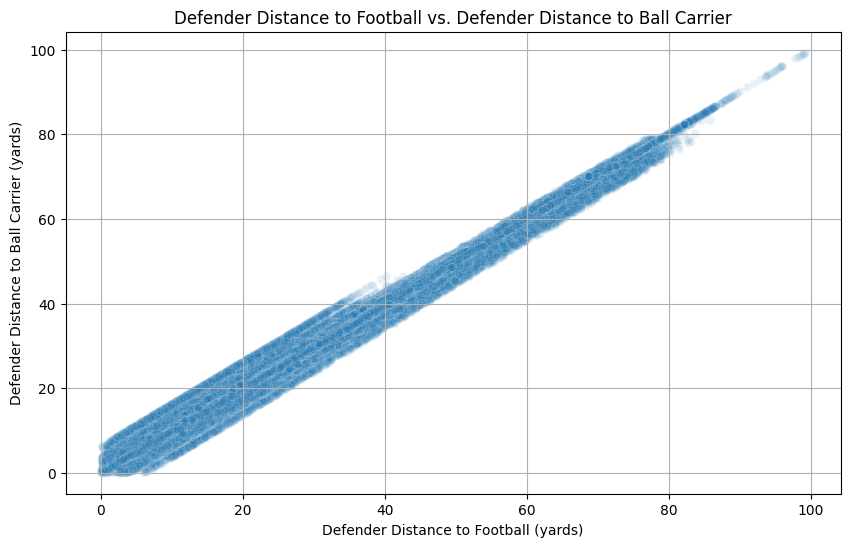

In [ ]:
import seaborn as sns

# Filter out rows with NaN values for accurate plotting
filtered_data = merged_data.dropna(subset=['defender_distance_to_football', 'defender_carrier_dist'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='defender_distance_to_football', y='defender_carrier_dist', data=filtered_data, alpha=0.1)
plt.title('Defender Distance to Football vs. Defender Distance to Ball Carrier')
plt.xlabel('Defender Distance to Football (yards)')
plt.ylabel('Defender Distance to Ball Carrier (yards)')
plt.grid(True)
plt.show()


In [ ]:
merged_data.shape

(1407439, 23)

In [ ]:
from google.colab import files
# Assuming 'merged_data' is your DataFrame
merged_data.to_csv('merged_data.csv', index=False)

files.download('merged_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
merged2 = pd.read_csv('merged_data2.csv')


In [ ]:
merged2

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,...,defender_carrier_dist,mass_kg,weight_newtons,rho,force,o_rad,s_horizontal,s_vertical,a_horizontal,a_vertical
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370000,...,NaN,147.367,1445.6715,238.73454,169.47205,4.044626,-1.003154,-1.272038,-0.712116,-0.902990
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.470000,...,NaN,147.367,1445.6715,246.10289,89.89387,4.031362,-1.051418,-1.297467,-0.384051,-0.473925
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.560000,...,NaN,147.367,1445.6715,231.36619,72.20983,4.031362,-0.988459,-1.219774,-0.308500,-0.380694
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.640000,...,NaN,147.367,1445.6715,212.20848,131.15663,4.055796,-0.879007,-1.140590,-0.543275,-0.704948
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.720000,...,NaN,147.367,1445.6715,190.10343,182.73508,4.072900,-0.769853,-1.035097,-0.740014,-0.994977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407434,2022091200,3826,NaN,football,49,2022-09-12 23:05:57.799999,NaN,football,left,56.220001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1407435,2022091200,3826,NaN,football,50,2022-09-12 23:05:57.900000,NaN,football,left,56.060001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1407436,2022091200,3826,NaN,football,51,2022-09-12 23:05:58.000000,NaN,football,left,55.889999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1407437,2022091200,3826,NaN,football,52,2022-09-12 23:05:58.099999,NaN,football,left,55.730000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Assuming 'merged2' is your DataFrame
merged2 = merged2.drop('Unnamed: 0', axis=1)


In [ ]:

# Convert the orientation from degrees to radians
merged2['o_rad'] = np.radians(merged2['o'])

# Calculate the horizontal component of the speed
merged2['s_horizontal'] = merged2['s'] * np.cos(merged2['o_rad'])

# Calculate the vertical component of the speed
merged2['s_vertical'] = merged2['s'] * np.sin(merged2['o_rad'])


In [ ]:
# Assuming 'a' is the acceleration column and 'o_rad' is the orientation in radians
# Calculate the horizontal component of the acceleration
merged2['a_horizontal'] = merged2['a'] * np.cos(merged2['o_rad'])

# Calculate the vertical component of the acceleration
merged2['a_vertical'] = merged2['a'] * np.sin(merged2['o_rad'])


In [ ]:
merged2 = pd.read_csv('merged_data2.csv')


In [ ]:
import pandas as pd
merged3 = pd.read_csv('merged_data_full203.csv')
#pd.read_csv('mereged_data_full203.csv')
tackles = pd.read_csv('tackles.csv')

In [ ]:
tackles_filtered = tackles[tackles['tackle'] == 1]

merged_with_tackles = pd.merge(
    merged3, tackles_filtered[['gameId', 'playId', 'nflId']],
    on=['gameId', 'playId', 'nflId'],
    how='left',
    indicator=True
);

# Create the tackle_event column based on whether the merge found a match
merged_with_tackles['tackle_event'] = (merged_with_tackles['_merge'] == 'both').astype(int)
merged_with_tackles.drop(columns=['_merge'], inplace=True)

merged3 = merged_with_tackles

In [ ]:
merged3

,Unnamed: 0,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,...,weight_newtons,rho,force,ke,pe,total_energy,max_rho,rho_ratio,TME,tackle_event
0,0,2022090800,56,38577.0,Bobby Wagner,1,2022-09-08 20:24:05.200000,45.0,LA,left,...,1076.46924,136.06768,418.07892,84.361962,45.167125,129.529087,400.52180,0.339726,-0.166554,0
1,1,2022090800,56,38577.0,Bobby Wagner,2,2022-09-08 20:24:05.299999,45.0,LA,left,...,1076.46924,195.32296,486.11276,173.837434,55.951910,229.789344,400.52180,0.487671,0.290935,0
2,2,2022090800,56,38577.0,Bobby Wagner,3,2022-09-08 20:24:05.400000,45.0,LA,left,...,1076.46924,242.50772,460.87440,267.971031,54.216583,322.187614,400.52180,0.605479,-0.306490,0
3,3,2022090800,56,38577.0,Bobby Wagner,4,2022-09-08 20:24:05.500000,45.0,LA,left,...,1076.46924,296.27640,424.66284,399.973140,49.627483,449.600623,400.52180,0.739726,-0.697373,0
4,4,2022090800,56,38577.0,Bobby Wagner,5,2022-09-08 20:24:05.599999,45.0,LA,left,...,1076.46924,334.68260,350.04508,510.390965,40.750050,551.141015,400.52180,0.835616,0.459627,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643267,643267,2022091200,3826,54618.0,Tariq Woolen,49,2022-09-12 23:05:57.799999,27.0,SEA,left,...,911.88510,174.75540,231.45795,164.270076,6.389790,170.659866,506.60475,0.344954,-0.163341,0
643268,643268,2022091200,3826,54618.0,Tariq Woolen,50,2022-09-12 23:05:57.900000,27.0,SEA,left,...,911.88510,171.03720,218.44425,157.354224,12.631672,169.985896,506.60475,0.337615,0.263773,0
643269,643269,2022091200,3826,54618.0,Tariq Woolen,51,2022-09-12 23:05:58.000000,27.0,SEA,left,...,911.88510,171.96675,184.05090,159.069244,10.745531,169.814775,506.60475,0.339450,0.265207,0
643270,643270,2022091200,3826,54618.0,Tariq Woolen,52,2022-09-12 23:05:58.099999,27.0,SEA,left,...,911.88510,171.96675,157.09395,159.069244,9.303158,168.372402,506.60475,0.339450,0.265207,0


In [ ]:
merged4 = merged3[['defender_carrier_dist', 'defender_distance_to_football', 'rho', 'force', 'TME', 'tackle_event', 'total_energy','is_defensive_player']].query('is_defensive_player == 1')

In [ ]:
merged4

,defender_carrier_dist,defender_distance_to_football,rho,force,TME,tackle_event,total_energy,is_defensive_player
0,11.013632,9.256266,136.06768,418.07892,-0.166554,0,129.529087,1
1,10.246878,8.688046,195.32296,486.11276,0.290935,0,229.789344,1
2,9.464486,8.500617,242.50772,460.87440,-0.306490,0,322.187614,1
3,8.646531,8.557009,296.27640,424.66284,-0.697373,0,449.600623,1
4,7.812074,8.590053,334.68260,350.04508,0.459627,0,551.141015,1
...,...,...,...,...,...,...,...,...
643267,35.737231,36.223093,174.75540,231.45795,-0.163341,0,170.659866,1
643268,17.190352,17.293376,171.03720,218.44425,0.263773,0,169.985896,1
643269,16.632742,17.128135,171.96675,184.05090,0.265207,0,169.814775,1
643270,16.284747,16.886089,171.96675,157.09395,0.265207,0,168.372402,1


In [ ]:
# Convert DataFrame 'merged4' to CSV
merged4.to_csv('merged4.csv', index=False)


In [ ]:
from google.colab import files

# Download the file to your local system
files.download('merged4.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.model_selection import train_test_split

X_merged4 = merged4.drop(['tackle_event', 'is_defensive_player'], axis=1)  # Predictor variables
y_merged4 = merged4['tackle_event']  # Response variable

# Splitting the data into training and testing sets
X_train_merged4, X_test_merged4, y_train_merged4, y_test_merged4 = train_test_split(X_merged4, y_merged4, test_size=0.3, random_state=42)


In [ ]:
rf_merged4_balanced = RandomForestClassifier(n_estimators=190, random_state=50, class_weight='balanced')

#Training model
rf_merged4_balanced.fit(X_train_merged4, y_train_merged4)

# Predicting probs
y_pred_proba_merged4_balanced = rf_merged4_balanced.predict_proba(X_test_merged4)

# Check if the predicted probabilities have two columns for both classes
if y_pred_proba_merged4_balanced.shape[1] == 2:
    # decision threshold
    threshold = 0.25
    y_pred_merged4_balanced = (y_pred_proba_merged4_balanced[:, 1] >= threshold).astype(int)
else:
    # If only one class is predicted, use the probabilities as they are
    y_pred_merged4_balanced = (y_pred_proba_merged4_balanced[:, 0] >= threshold).astype(int)

# Evaluating the model
accuracy_merged4_balanced = accuracy_score(y_test_merged4, y_pred_merged4_balanced)
report_merged4_balanced = classification_report(y_test_merged4, y_pred_merged4_balanced)

accuracy_merged4_balanced, report_merged4_balanced  # Returning the accuracy and the classification report


(0.920874924719058,
 '              precision    recall  f1-score   support\n\n           0       0.93      0.98      0.96     72404\n           1       0.36      0.12      0.18      5637\n\n    accuracy                           0.92     78041\n   macro avg       0.65      0.55      0.57     78041\nweighted avg       0.89      0.92      0.90     78041\n')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

accuracy_merged4_balanced = accuracy_score(y_test_merged4, y_pred_merged4_balanced)
precision_merged4_balanced = precision_score(y_test_merged4, y_pred_merged4_balanced)
f1_merged4_balanced = f1_score(y_test_merged4, y_pred_merged4_balanced)

# Print the Accuracy, Precision, and F1 Score
print(f"Accuracy for the Balanced Random Forest Model: {accuracy_merged4_balanced:.2f}")
print(f"Precision for the Balanced Random Forest Model: {precision_merged4_balanced:.2f}")
print(f"F1 Score for the Balanced Random Forest Model: {f1_merged4_balanced:.2f}")



Accuracy for the Balanced Random Forest Model: 0.92
Precision for the Balanced Random Forest Model: 0.36
F1 Score for the Balanced Random Forest Model: 0.18


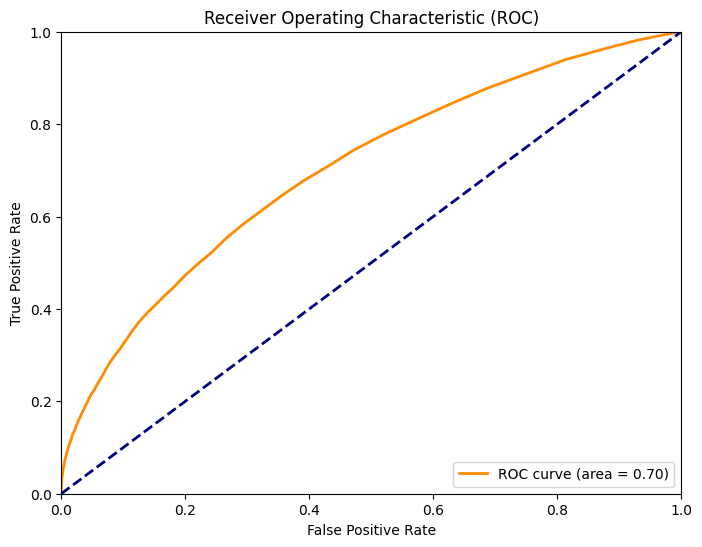

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predicting probabilities on the test set for the positive class
y_pred_proba_merged4_balanced = rf_merged4_balanced.predict_proba(X_test_merged4)[:, 1]

# Calculate the ROC curve points and AUC
fpr, tpr, thresholds = roc_curve(y_test_merged4, y_pred_proba_merged4_balanced)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.00])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


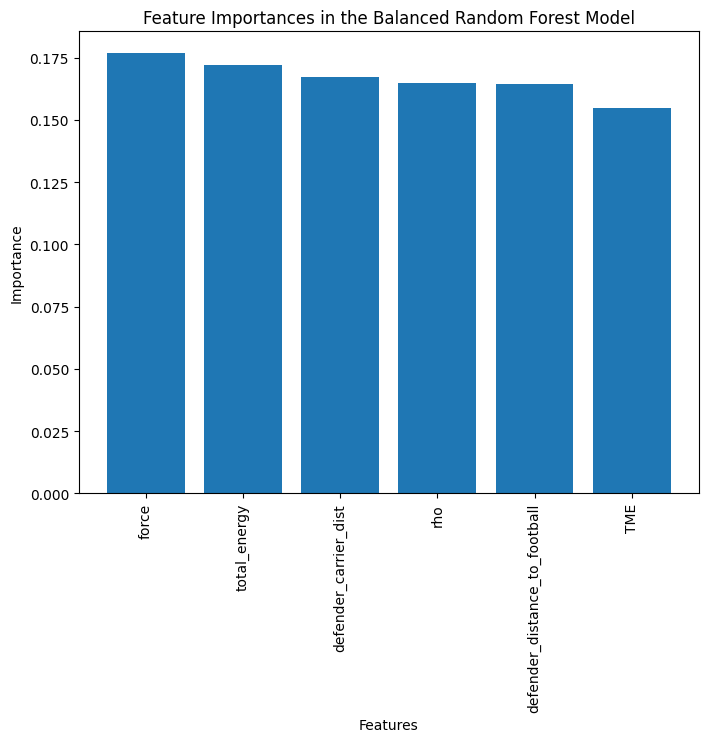

In [ ]:
# Feature importances from the new Random Forest model with balanced class weight
importances_merged4_balanced = rf_merged4_balanced.feature_importances_

# Sorting the feature importances in descending order
indices_merged4_balanced = np.argsort(importances_merged4_balanced)[::-1]

#Plotting Feature Importances
plt.figure(figsize=(8, 6))
plt.title('Feature Importances in the Balanced Random Forest Model')
plt.bar(range(X_train_merged4.shape[1]), importances_merged4_balanced[indices_merged4_balanced], align='center')
plt.xticks(range(X_train_merged4.shape[1]), X_train_merged4.columns[indices_merged4_balanced], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


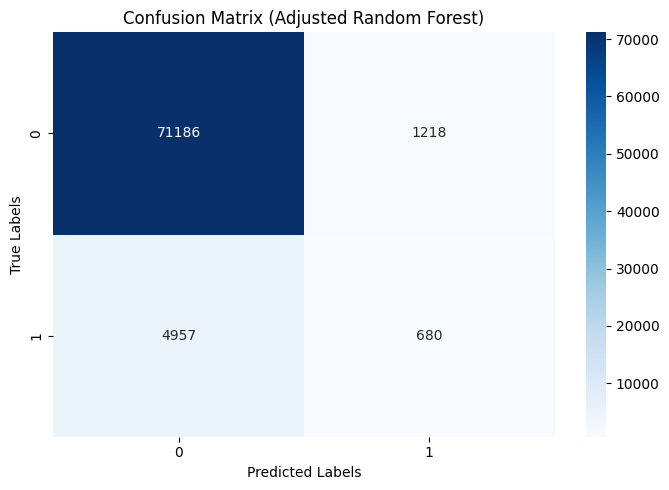

In [ ]:
# Correcting the code to plot only the confusion matrix for the new Random Forest model with adjusted threshold

# Assuming y_test_merged4 and y_pred_merged4_balanced are already defined as your test labels
# and predicted labels from the new Random Forest model with adjusted threshold

# Confusion Matrix for the adjusted threshold (0.26)
cm_adjusted = confusion_matrix(y_test_merged4, y_pred_merged4_balanced)

# Plotting the adjusted confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm_adjusted, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix (Adjusted Random Forest)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()


Adjusted XGBoost Model Performance:
Accuracy: 0.89
Precision: 0.21
Recall: 0.20
F1 Score: 0.20


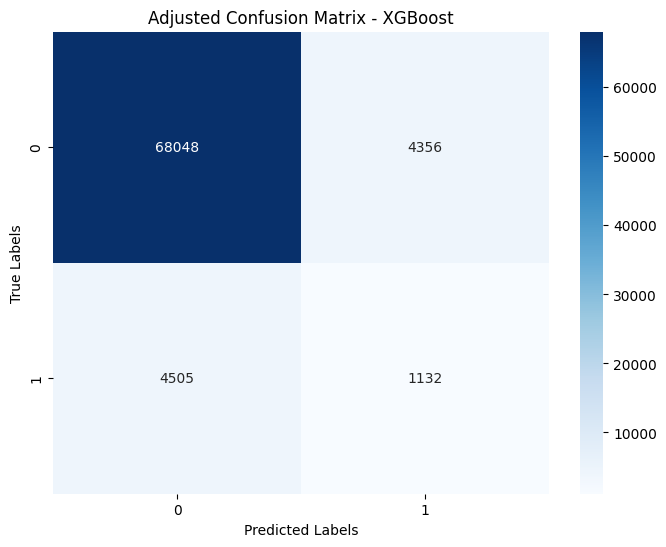

In [ ]:
# XGB

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Your data splits here
# X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb

# Initialize the XGBoost classifier with scale_pos_weight
scale_pos_weight_value = sum(y_train_xgb == 0) / sum(y_train_xgb == 1)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight_value)

# Fit the model
xgb_model.fit(X_train_xgb, y_train_xgb)

# Predict probabilities
y_pred_proba_xgb = xgb_model.predict_proba(X_test_xgb)[:, 1]

# Adjust the decision threshold
threshold = 0.65  # Example threshold, this value should be tuned
y_pred_adjusted_xgb = (y_pred_proba_xgb >= threshold).astype(int)

# Calculate new performance metrics
new_accuracy_xgb = accuracy_score(y_test_xgb, y_pred_adjusted_xgb)
new_precision_xgb = precision_score(y_test_xgb, y_pred_adjusted_xgb)
new_recall_xgb = recall_score(y_test_xgb, y_pred_adjusted_xgb)
new_f1_score_xgb = f1_score(y_test_xgb, y_pred_adjusted_xgb)

# Print the new performance summary
print("Adjusted XGBoost Model Performance:")
print(f"Accuracy: {new_accuracy_xgb:.2f}")
print(f"Precision: {new_precision_xgb:.2f}")
print(f"Recall: {new_recall_xgb:.2f}")
print(f"F1 Score: {new_f1_score_xgb:.2f}")

# Calculate and plot the new confusion matrix
new_cm_xgb = confusion_matrix(y_test_xgb, y_pred_adjusted_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(new_cm_xgb, annot=True, fmt="d", cmap="Blues")
plt.title('Adjusted Confusion Matrix - XGBoost')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


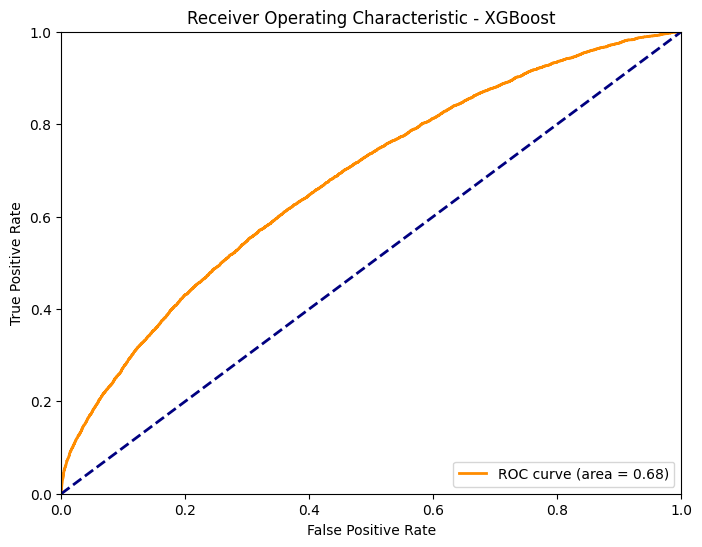

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming xgb_model is your trained XGBoost model and X_test_xgb are your test features

# Predict the probabilities for the positive class
y_pred_proba_xgb = xgb_model.predict_proba(X_test_xgb)[:, 1]

# Compute ROC curve and ROC area for the XGBoost model
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_xgb, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plotting ROC Curve for the XGBoost model
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.00])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - XGBoost')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

# Assuming y_test_merged4 contains the actual class labels and y_pred_proba_merged4_balanced contains predicted probabilities
mse_rf = mean_squared_error(y_test_merged4, y_pred_proba_merged4_balanced)
print(f"MSE for Random Forest: {mse_rf}")

# Assuming y_test_xgb contains the actual class labels and y_pred_proba_xgb contains predicted probabilities
mse_xgb = mean_squared_error(y_test_xgb, y_pred_proba_xgb)
print(f"MSE for XGBoost: {mse_xgb}")


MSE for Random Forest: 0.0629484029649732
MSE for XGBoost: 0.19482850219044762


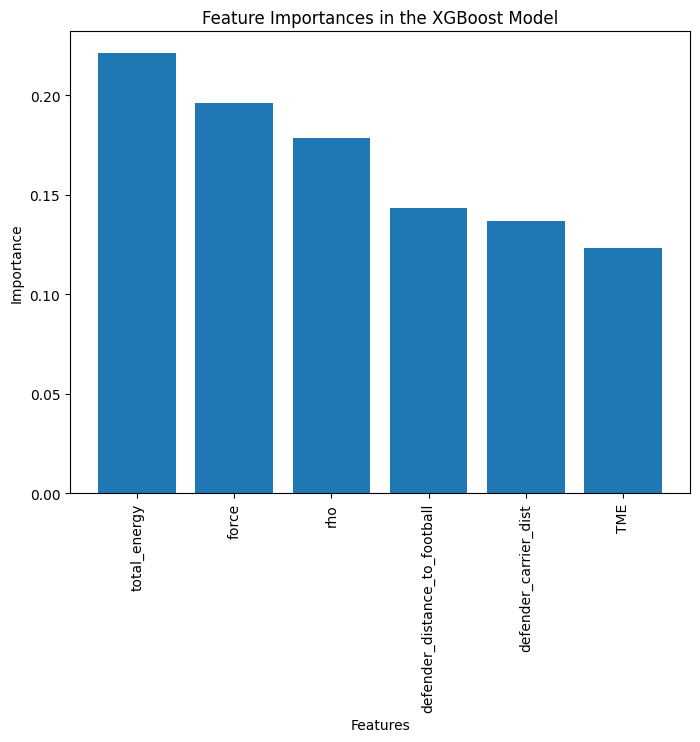

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming xgb_model is your trained XGBoost model and X_train_xgb are your training features

# Get feature importances from the XGBoost model
importances_xgb = xgb_model.feature_importances_

# Sort the feature importances in descending order
indices_xgb = np.argsort(importances_xgb)[::-1]

# Plotting Feature Importances
plt.figure(figsize=(8, 6))
plt.title('Feature Importances in the XGBoost Model')
plt.bar(range(X_train_xgb.shape[1]), importances_xgb[indices_xgb], align='center')
plt.xticks(range(X_train_xgb.shape[1]), X_train_xgb.columns[indices_xgb], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [ ]:
az.plot_trace(trace)

In [ ]:
#logistic model w/ bayes and ADVI

import pymc as pm
import numpy as np


X = merged4[['defender_carrier_dist', 'defender_distance_to_football', 'rho', 'force', 'TME', 'total_energy']]
y = merged4['tackle_event']

# Standardizing the features
X_standardized = (X - X.mean()) / X.std()
X_standardized['intercept'] = 1  # Adding intercept term


# Assuming 'merged4' is your DataFrame
X = merged4[['defender_carrier_dist', 'defender_distance_to_football', 'rho', 'force', 'TME', 'total_energy']].values
y = merged4['tackle_event'].values

# Standardize the predictors
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

with pm.Model() as model_tackle_event:
    # Priors for the intercept and coefficients
    β = pm.Normal("β", mu=0, sigma=2, shape=X_std.shape[1])
    β_0 = pm.Normal("β_0", mu=0, sigma=2)

    # Linear combination of predictors
    μ = β_0 + pm.math.dot(X_std, β)

    # Sigmoid link function
    θ = pm.math.sigmoid(μ)

    # Observations
    y_obs = pm.Bernoulli("y_obs", p=θ, observed=y)

    # ADVI
    approx = pm.fit(method='advi', n=30000)  # You can adjust the number of iterations (n)

# Extracting the variational posterior
trace_tackle_event = approx.sample(draws=1000)


/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


array([[<Axes: title={'center': 'β'}>, <Axes: title={'center': 'β'}>],
       [<Axes: title={'center': 'β_0'}>, <Axes: title={'center': 'β_0'}>]],
      dtype=object)

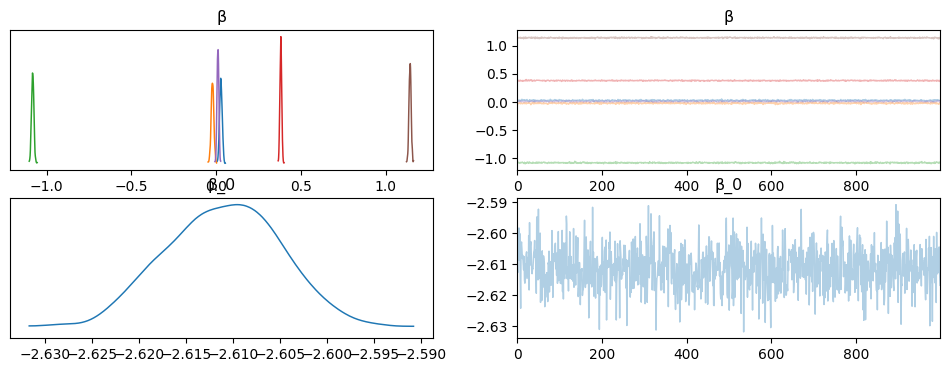

In [ ]:
import arviz as az

az.plot_trace(trace_tackle_event)

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

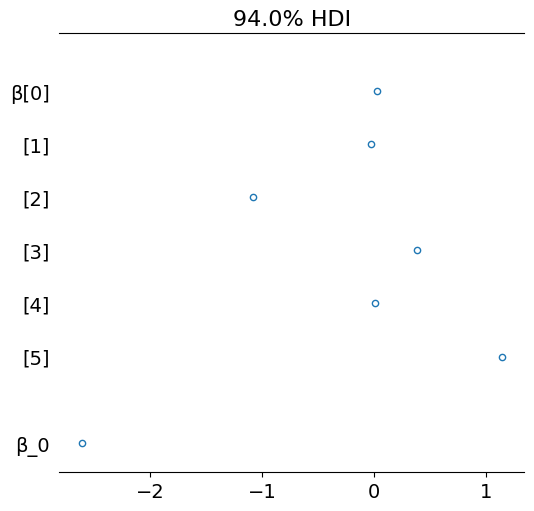

In [ ]:
az.plot_forest(trace_tackle_event, hdi_prob=0.94, combined=True)


In [ ]:
az.plot_posterior(trace_tackle_event)

NameError: ignored

In [ ]:
from sklearn.metrics import roc_auc_score

with model_tackle_event:
    ppc = pm.sample_posterior_predictive(trace_tackle_event)

# Print the keys of the ppc dictionary
print(ppc.keys())

# Access the 'posterior_predictive' key
posterior_predictive_data = ppc['posterior_predictive']
print(posterior_predictive_data)

KeysView(Inference data with groups:
	> posterior_predictive
	> observed_data)
<xarray.Dataset>
Dimensions:      (chain: 1, draw: 1000, y_obs_dim_2: 643272)
Coordinates:
  * chain        (chain) int64 0
  * draw         (draw) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * y_obs_dim_2  (y_obs_dim_2) int64 0 1 2 3 4 ... 643268 643269 643270 643271
Data variables:
    y_obs        (chain, draw, y_obs_dim_2) int64 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
Attributes:
    created_at:                 2023-12-09T18:53:19.369494
    arviz_version:              0.15.1
    inference_library:          pymc
    inference_library_version:  5.7.2


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import arviz as az

# Flatten the array if it's not already 1D
# We're assuming that the first dimension corresponds to the number of posterior samples (1000)
# and the second dimension corresponds to the number of test instances, which should match the length of y_test_merged4
predicted_probabilities = np.mean(posterior_predictive_data, axis=0)

# Check if the lengths of predicted_probabilities and y_test_merged4 match
print(predicted_probabilities.shape, len(y_test_merged4))

# If they match, proceed with ROC calculation
if predicted_probabilities.shape[0] == len(y_test_merged4):
    fpr, tpr, thresholds = roc_curve(y_test_merged4, predicted_probabilities)
    roc_auc = roc_auc_score(y_test_merged4, predicted_probabilities)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    # Print the AUC
    print(f'AUC: {roc_auc}')
else:
    print("The lengths of the predicted probabilities and true labels don't match.")


NameError: ignored

In [ ]:
import arviz as az

# To get the names of the variables in the posterior
posterior_vars = list(trace_tackle_event.posterior.data_vars)
print("Posterior variables:", posterior_vars)

# To see all the keys in the posterior predictive checks dictionary
ppc_vars = list(ppc.posterior_predictive.data_vars)
print("PPC variables:", ppc_vars)


Posterior variables: ['β', 'β_0']
PPC variables: ['y_obs']


In [ ]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'merged4' is your DataFrame
X = merged4[['defender_carrier_dist', 'defender_distance_to_football', 'rho', 'force', 'TME', 'total_energy']].values
y = merged4['tackle_event'].values

# Standardize the predictors
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

with pm.Model() as model_tackle_event:
    # Priors for the intercept and coefficients
    β = pm.Normal("β", mu=0, sigma=2, shape=X_std.shape[1])
    β_0 = pm.Normal("β_0", mu=0, sigma=2)

    # Linear combination of predictors
    μ = β_0 + pm.math.dot(X_std, β)

    # Sigmoid link function
    θ = pm.math.sigmoid(μ)

    # Observations
    y_obs = pm.Bernoulli("y_obs", p=θ, observed=y)

    # ADVI
    with model_tackle_event:
        advi_fit = pm.fit(method='advi', n=10000)

# ELBO plot
elbo = -np.array(advi_fit.hist)
plt.plot(elbo)
plt.xlabel('Iteration')
plt.ylabel('ELBO')
plt.title('ADVI Convergence')
plt.show()


NameError: ignored